# Python Homework 5

**Release date:** Thursday, July 24th <br>
**Due date:** Wednesday, __July 30th__, 11:59 p.m. via Gradescope

**Instruction:** Please upload your ipynb file on Gradescope with filename "PythonHW5_YOURPERMNUMBER".

In [1]:
# I also decided to add pandas so I can display transition matrices more cleanly
import pandas as pd
import numpy as np 
from numpy import linalg 
import scipy.linalg
import matplotlib.pyplot as plt

# Problem 1 (10 pt)

Consider a Markov chain with 5 states  $S=\{1,2,3,4,5 \}$. The transition matrix is given by: 

\begin{gather*}
P= \begin{pmatrix}
 0.3 & 0.5 & 0 & 0 & 0.2  \\
0.5 & 0 & 0.5 & 0 & 0 \\
0.1 & 0.6 & 0.2 & 0.1 & 0 \\
0.1 & 0 & 0 & 0.9 & 0\\
0 & 0 & 0 & 0 & 1\\\end{pmatrix}.
\end{gather*}

Each time the chain is in state $i=1,2,3$ you get a reward of $i$ dollars. When the chain is in states 4 or 5, you get zero reward. 

1. <font color="red">__(2 Points)__</font> Describe in 2-3 sentences what happens to $X_n$ in the long-run, as $n \to \infty$ (justify your answer). To support your answer, compute and print out $P^n$ for $n=10,25,100$.


**Student explanation**:
In the long-run, as n approaches infinity, $X_n$ will be in state 5. This is because state 5 is an absorbing state, and while 5 can only be accessed by either starting in state 5 or state 1, all states can access state 1 so there's always a path to 5, where it will stay.

In [2]:
# Write your code here
P = np.array([[0.3, 0.5, 0.0, 0.0, 0.2],
              [0.5, 0.0, 0.5, 0.0, 0.0],
              [0.1, 0.6, 0.2, 0.1, 0.0],
              [0.1, 0.0, 0.0, 0.9, 0.0],
              [0.0, 0.0, 0.0, 0.0, 1.0]])

states = [1, 2, 3, 4, 5]

# Print P^n for n=10, 25, 100
for n in [10, 25, 100]:
    print(f'{n} step matrix:')

    # Compute n step matrix, store as DataFrame
    n_matrix = pd.DataFrame(np.linalg.matrix_power(P, n), index = states, columns = states)

    # Print DataFrame
    display(n_matrix)

10 step matrix:


,1,2,3,4,5
1,0.129436,0.125285,0.090454,0.076264,0.578561
2,0.158628,0.162810,0.107194,0.109608,0.461760
3,0.171912,0.161976,0.115233,0.142469,0.408410
4,0.158289,0.124860,0.076264,0.378603,0.261983
5,0.000000,0.000000,0.000000,0.000000,1.000000


25 step matrix:


,1,2,3,4,5
1,0.047356,0.044234,0.029891,0.053301,0.825218
2,0.060872,0.056686,0.038255,0.069939,0.774248
3,0.067491,0.062545,0.042097,0.080241,0.747627
4,0.089964,0.080599,0.053301,0.130846,0.645290
5,0.000000,0.000000,0.000000,0.000000,1.000000


100 step matrix:


,1,2,3,4,5
1,0.000793,0.000725,0.000485,0.001020,0.996977
2,0.001026,0.000939,0.000628,0.001321,0.996085
3,0.001153,0.001055,0.000706,0.001483,0.995603
4,0.001666,0.001525,0.001020,0.002144,0.993645
5,0.000000,0.000000,0.000000,0.000000,1.000000


2. <font color="red">__(3 Points)__</font> We start with $X_0 = 1$ and are interested in analyzing the total winnings $W = \sum_{n=0}^\infty f(X_n)$ where $f(i) = i, i=1,2,3$ and $f(4) = f(5) = 0$ as above.  Using part a), explain in 2-3 sentences why $W$ is a finite random variable. 

To estimate *W*, write a function __simulateWinnings__ to simulate a trajectory of $X_0=1, X_1, \ldots, X_{200}$ (so 201 steps for each trajectory) and record the respective total winnings on that simulation.

**Student Explanation**: $W$ is a finite random variable because you can only get winnings when in states $1$, $2$ and $3$. However, in the long-run, $X_n$ will hit state $5$ in finite time. Since 5 is an absorbing state, and any subsequent $X_n$'s will give no payout, the payout, $W$ will be finite.

In [3]:
# WRITE YOUR OWN CODE HERE
def simulateWinnings(i): # Since in another part we calculate with a different X_0, add state parameter. i is equal to what X_0 we start with

    # states to travel to and from
    states = [1, 2, 3, 4, 5]

    # Initiate a list to store f(i) values from X_n values
    i_n = []
    
    # Initiate X_0 = 1
    current_state = i
    winnings = 0

    # Iterate over X_0 to X_200
    for n in range(0, 201):

        # Function f(i) as an if statement
        if current_state < 4:
            i_n.append(current_state)
        else:
            i_n.append(0)

        if n < 200:
            # Use transition matrix to simulate next step
            next_state = np.random.choice(states, p = P[current_state - 1]) # Subtract one from current state since arrays indexed from 0 to 4

            # Change current state to next state
            current_state = next_state

    # Calculate total winnings from X_0 to X_200
    winnings += sum(i_n)
    
    return winnings

In [6]:
simulateWinnings(1)

43

3. <font color="red"> __(5 Points)__</font> Use your function to generate $M=1000$ trajectories of $X_n, n=0,\ldots, 200$. Plot a histogram of the resulting distribution of $W$ and report its mean and variance, i.e. the estimates of $\mathbb{E}_1[W]$ and $Var(W | X_0 = 1)$.  **Repeat** the above but starting at $$X_0=3$$.

The estimated mean of W is: 19.927
The estimated variance of W is: 592.6122832832833


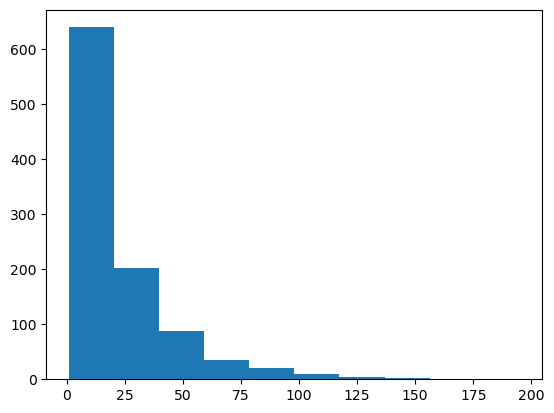

In [7]:
M = 1000

# Initiate empty list to store simulateWinnings values for histogram
simList = []

# Run simulateWinnings 1000 times given X_0 = 1 and store in list
for m in range(M):
    simList.append(simulateWinnings(1))

plt.hist(simList)
plt.show

# Convert simList to np array to calculate empirical mean and variance
simList = np.array(simList)
emp_mean = np.mean(simList)
emp_var = np.var(simList, ddof = 1)

print(f'The estimated mean of W is: {emp_mean}')

print(f'The estimated variance of W is: {emp_var}')

The estimated mean of W is: 28.972
The estimated variance of W is: 602.1733893893894


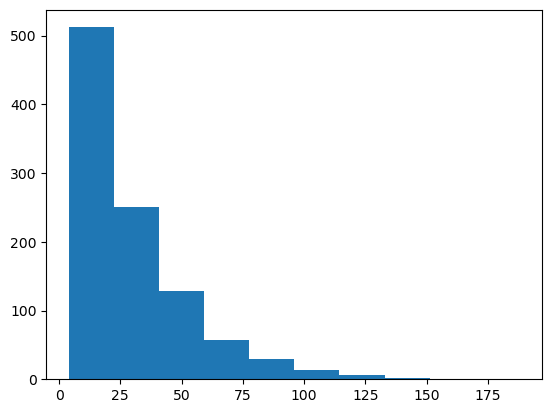

In [8]:
# For X_0 = 3

# Initiate empty list to store simulateWinnings values 
simList3 = []

# Run simulateWinnings 1000 times given X_0 = 3 and store in list
for m in range(M):
    simList3.append(simulateWinnings(3))

plt.hist(simList3)
plt.show

# Convert simList to np array to calculate empirical mean and variance
simList = np.array(simList3)
emp_mean = np.mean(simList3)
emp_var = np.var(simList3, ddof = 1)

print(f'The estimated mean of W is: {emp_mean}')

print(f'The estimated variance of W is: {emp_var}')

## Problem 2 (10 pt)

Consider the gambler's ruin problem where you start with an initial capital of $0 < x_0 < 20$ dollars and end the game if your wealth is zero (you go bankrupt), or you get to 20 dollars. Let us assume that the probability of winning any round is $$p=18/37.$$ (European casino with '0' but no '00' slot). 

a) <font color="red">__(2 Points)__</font> Write a function __lengthOfGame__ which simulates a trajectory of your cumulative capital and returns the **number of rounds the game lasts** (until you're ruined or have \$20). The function should use __x0__ (which is an integer) as a parameter. *Note:* you should use a while-loop since there is no a priori upper bound on how long you might play.

**Student's note**: Assuming that the stakes are $1 since it is not explicitly stated above.

In [50]:
# WRITE YOUR OWN CODE HERE
def lengthOfGame(x0):
    # Variable to count rounds
    n_rounds = 0

    # Keep going while not in ruin or in winning state
    while 0 < x0 < 20:
        n_rounds += 1

        # Sample round
        x0 = np.random.choice([x0 + 1, x0 - 1], p = [18/37, 19/37])

    return n_rounds


36

b) <font color="red">__(1 Point)__</font> Write a function __visitsToSeven__ which simulates a trajectory of your cumulative capital and returns the number of times until the game ended that you had exactly seven dollars (the Markov chain visited state '7'). The function should again use x0 as an input parameter.

In [91]:
# WRITE YOUR OWN CODE HERE
def visitsToSeven(x0):
    # Variable to count times at 7
    visits = 0

    # Keep going while not in ruin or in winning state
    while 0 < x0 < 20:

        # Add to counter if x0 is equal to 7
        if x0 == 7:
            visits += 1

        # Sample round
        x0 = np.random.choice([x0 + 1, x0 - 1], p = [18/37, 19/37])

    return visits

visitsToSeven(5)

10

c) <font color="red">__(7 Points)__</font> Use your functions from parts (a) and (b) and at least 1000 simulations, to find (by trial-and-error, show your experiments!) the initial state *x0* that (i) maximizes lengthOfGame; (ii) maximizes visitsToSeven. Print out the respective values of x0 and the corresponding estimate of average length of playing and average number of visits to '7'. Create a plot for these outputs as a function of $$x_0=1,2,\ldots,19.$$

In [124]:
# Initialize np arrays to store the mean rounds of both game length and visits to seven.
# The index of the array indicates the starting capital of the experiment
game_length_mean = np.zeros(20)
visits_to_7_mean = np.zeros(20)

# Initialize np arrays to store the individual simulations
game_length = np.empty(1000)
visits_to_7 = np.empty(1000)

# Iterate over x_0 = 1, 2, ..., 19
for capital in range(1, 20):

    # Iterate over 1000 simulations for each x_0 value
    for m in range(1000):
        game_length[m] = lengthOfGame(capital)
        visits_to_7[m] = visitsToSeven(capital)

    # Calculate the mean for both simulations over each x_0 value
    game_length_mean[capital] = np.mean(game_length)
    visits_to_7_mean[capital] = np.mean(visits_to_7)

Text(0, 0.5, 'Average Length in Rounds')

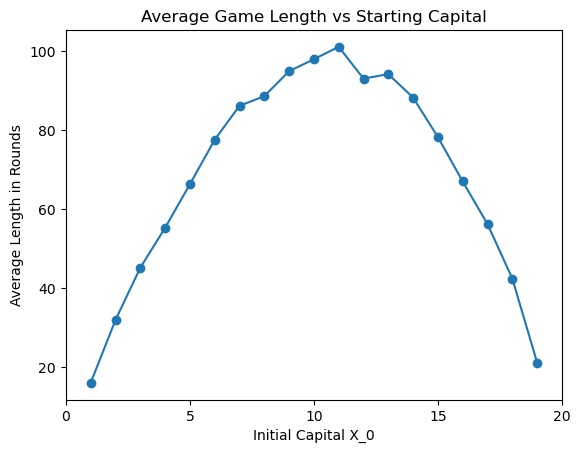

In [135]:
# Plot average game length as a function of x_0
plt.plot(range(1, 20), game_length_mean[1:], marker = 'o')
plt.title("Average Game Length vs Starting Capital")
plt.xticks(ticks=range(0, 21, 5))  # Set x-axis ticks every 5 units
plt.xlabel("Initial Capital X_0")
plt.ylabel("Average Length in Rounds")

Text(0, 0.5, 'Average Number of Rounds')

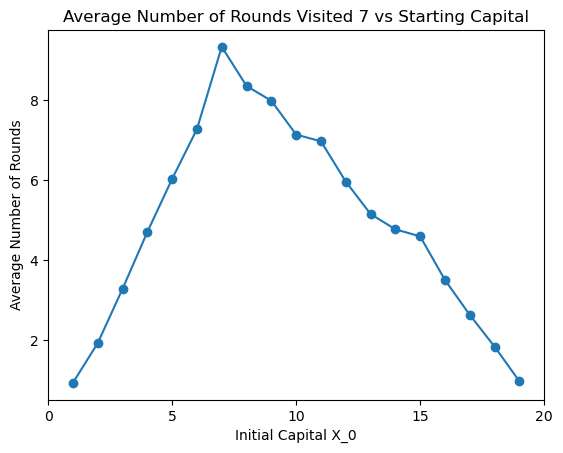

In [136]:
# Plot average amount of rounds that visit 7 as a function of x_0
plt.plot(range(1, 20), visits_to_7_mean[1:], marker = 'o')
plt.title("Average Number of Rounds Visited 7 vs Starting Capital")
plt.xticks(ticks=range(0, 21, 5))  # Set x-axis ticks every 5 units
plt.xlabel("Initial Capital X_0")
plt.ylabel("Average Number of Rounds")

In [127]:
# Find which x0 value gave the max game length and max visits to 7
x0_max_game = np.argmax(game_length_mean)
x0_max_visits_to_7 = np.argmax(visits_to_7_mean)

In [129]:
# WRITE YOUR OWN CODE HERE
print(f'The initial capital that maximizes the length of playing is: {x0_max_game}')
print(f'The corresponding expected number of rounds for the game to last is: {game_length_mean[x0_max_game]}')

# WRITE YOUR OWN CODE HERE
print(f'The initial capital that maximizes number of times you have 7 dollars is: {x0_max_visits_to_7}')
print(f'The corresponding expected number of visits to state 7 is: {visits_to_7_mean[x0_max_visits_to_7]}')


The initial capital that maximizes the length of playing is: 11
The corresponding expected number of rounds for the game to last is: 101.066
The initial capital that maximizes number of times you have 7 dollars is: 7
The corresponding expected number of visits to state 7 is: 9.331
